In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
model=tf.keras.models.load_model('/Users/withmocha/Desktop/VisualStudioCode/Capstone Design project/sentence base/model/saved model/CNNLSTM.h5')

2024-04-07 20:25:54.507923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-07 20:25:54.508727: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-07 20:25:54.509163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 382, 64)           256       
                                                                 
 batch_normalization (BatchN  (None, 382, 64)          256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 191, 64)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 189, 128)          24704     
                                                                 
 batch_normalization_1 (Batc  (None, 189, 128)         512       
 hNormalization)                                                 
                                                        

In [4]:
data_row=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/transformed/sentenceTransformer_vetorized.csv")
data_row.drop(columns=['Unnamed: 0'],inplace=True)
data_row.drop(columns=['predict'],inplace=True)
x_train=pd.DataFrame(data_row)

In [5]:
import pandas as pd

x_test=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/transformed/other/x_test.csv")
y_test=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/transformed/other/y_test.csv")

x_test.drop(columns=['Unnamed: 0'],inplace=True)
y_test.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
y_test

,predict
0,1
1,1
2,1
3,1
4,1
...,...
495,1
496,1
497,1
498,1


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) # test set에는 transform만 사용하기

In [8]:
x_test.shape

(500, 384)

In [9]:
x_test = tf.cast(x_test, tf.float32)

In [10]:
x_test = tf.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [11]:
x_test

<tf.Tensor: shape=(500, 384, 1), dtype=float32, numpy=
array([[[0.6892319 ],
        [0.36294976],
        [0.6079691 ],
        ...,
        [0.38962364],
        [0.5902495 ],
        [0.57835597]],

       [[0.66638005],
        [0.44281447],
        [0.499844  ],
        ...,
        [0.47871447],
        [0.33750746],
        [0.56224054]],

       [[0.5303241 ],
        [0.46591383],
        [0.70120794],
        ...,
        [0.5112138 ],
        [0.4920013 ],
        [0.5667965 ]],

       ...,

       [[0.61993676],
        [0.39750797],
        [0.5751135 ],
        ...,
        [0.4552074 ],
        [0.45842278],
        [0.4654789 ]],

       [[0.49388215],
        [0.46675885],
        [0.59619236],
        ...,
        [0.5064777 ],
        [0.52672225],
        [0.49897832]],

       [[0.6443358 ],
        [0.3458393 ],
        [0.633872  ],
        ...,
        [0.59749067],
        [0.35411078],
        [0.56914645]]], dtype=float32)>

In [12]:
pred = model.predict(x_test)

2024-04-07 20:25:55.791418: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-07 20:25:55.902221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-07 20:25:55.902785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-07 20:25:55.903287: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

16/16 [==============================] - 1s 17ms/step


In [13]:
pred

array([[1.15079674e-05],
       [2.51620404e-05],
       [2.31954182e-05],
       [4.46797530e-05],
       [1.55281778e-05],
       [2.18668629e-05],
       [2.19393005e-05],
       [3.11048207e-05],
       [2.61739387e-05],
       [3.43346655e-05],
       [1.86460747e-05],
       [3.10404648e-05],
       [2.06986697e-05],
       [1.78509781e-05],
       [4.33076420e-05],
       [3.96535979e-05],
       [2.18644018e-05],
       [2.09773552e-05],
       [1.63274126e-05],
       [2.46302570e-05],
       [2.89741492e-05],
       [2.22943308e-05],
       [6.97459545e-05],
       [1.67602175e-05],
       [2.17766064e-05],
       [3.79215708e-05],
       [2.98072919e-05],
       [1.32048035e-05],
       [3.34858341e-05],
       [3.04457062e-05],
       [5.25844371e-05],
       [1.51094227e-05],
       [2.32818711e-05],
       [3.37199199e-05],
       [6.14415109e-03],
       [1.11271534e-02],
       [2.79426968e-05],
       [7.36520858e-04],
       [1.53607936e-04],
       [4.21889963e-05],


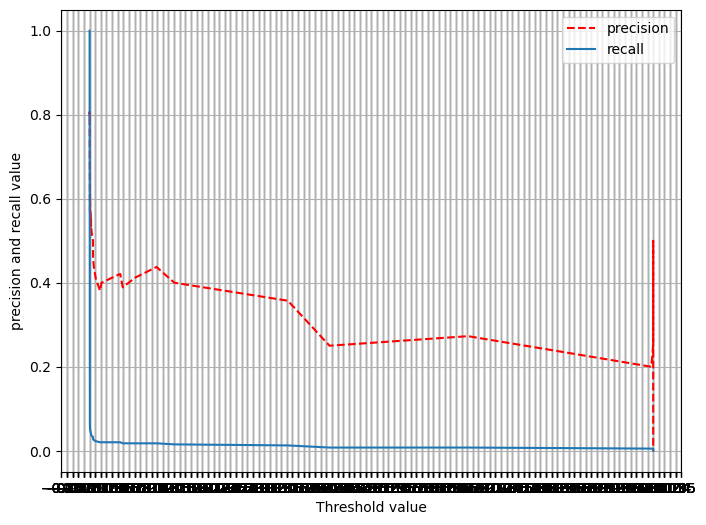

In [14]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

def precision_recall_curve_plot(y_test,pred):
    precisions, recalls,thresholds = precision_recall_curve(y_test,pred)
    
    plt.figure(figsize=(8,6))
    threshold_index = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_index],'r--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_index],label='recall')
    
    start,end = plt.xlim()
    plt.xticks(np.around(np.arange(start,end,0.001),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('precision and recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,pred)

In [15]:
precisions, recalls,thresholds = precision_recall_curve(y_test,pred)

max=precisions[0]
num=0
for i in range(len(thresholds)):
    if max<precisions[i]:
        num=i
        max=precisions[i]
thresholds_fit=thresholds[num]

In [16]:
y_pred=pred.reshape(-1)
y_pred

array([1.15079674e-05, 2.51620404e-05, 2.31954182e-05, 4.46797530e-05,
       1.55281778e-05, 2.18668629e-05, 2.19393005e-05, 3.11048207e-05,
       2.61739387e-05, 3.43346655e-05, 1.86460747e-05, 3.10404648e-05,
       2.06986697e-05, 1.78509781e-05, 4.33076420e-05, 3.96535979e-05,
       2.18644018e-05, 2.09773552e-05, 1.63274126e-05, 2.46302570e-05,
       2.89741492e-05, 2.22943308e-05, 6.97459545e-05, 1.67602175e-05,
       2.17766064e-05, 3.79215708e-05, 2.98072919e-05, 1.32048035e-05,
       3.34858341e-05, 3.04457062e-05, 5.25844371e-05, 1.51094227e-05,
       2.32818711e-05, 3.37199199e-05, 6.14415109e-03, 1.11271534e-02,
       2.79426968e-05, 7.36520858e-04, 1.53607936e-04, 4.21889963e-05,
       2.58355794e-05, 4.58042523e-05, 3.40277402e-05, 2.83713234e-05,
       5.01147115e-05, 1.85897021e-04, 5.46140109e-05, 3.73404000e-05,
       1.87448113e-05, 2.08023812e-05, 2.31907288e-05, 1.15950406e-05,
       4.31430853e-05, 1.98519501e-05, 2.69452139e-05, 1.55670677e-05,
      

In [17]:
y_pred=pred.reshape(-1)
threshold = thresholds_fit
pred = (y_pred >= threshold)

In [18]:
pred

array([False,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
        True, False, False, False,  True,  True, False,  True, False,
        True,  True, False,  True,  True, False, False,  True,  True,
       False, False,  True, False,  True,  True, False,  True,  True,
       False,  True,  True, False, False,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [19]:
import numpy as np

y_test=np.array(y_test['predict'])


In [20]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [21]:
from sklearn.metrics import accuracy_score

accuracy_test= accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy_test}')

Accuracy: 0.67
